In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [6]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images=train_images.reshape((60000,28,28)).astype('float32')/255
test_images=test_images.reshape((10000,28,28)).astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


In [7]:
input_shape=(28,28)
inputs=Input(shape=input_shape)
lstm=LSTM(128)(inputs)
outputs=Dense(10,activation='softmax')(lstm)
model=Model(inputs=inputs,outputs=outputs)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9885 - loss: 0.0374 - val_accuracy: 0.9861 - val_loss: 0.0441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9882 - val_loss: 0.0420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9872 - val_loss: 0.0401
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9898 - val_loss: 0.0362
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9945 - loss: 0.0197 - val_accuracy: 0.9827 - val_loss: 0.0594


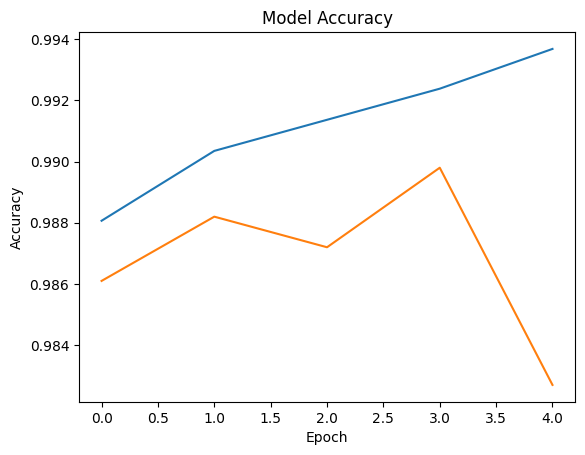

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

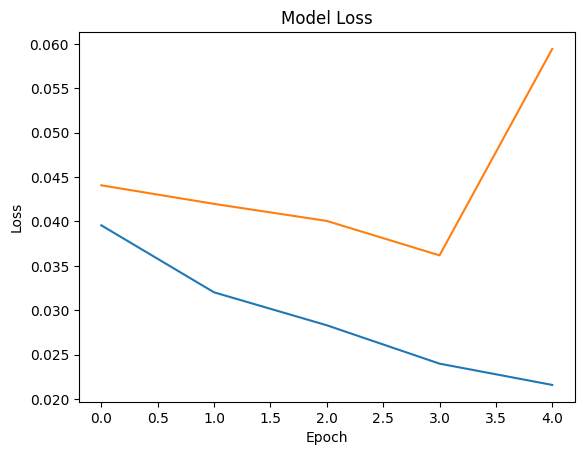

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [18]:
y_pred=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [19]:
import numpy as np

y_pred1=np.argmax(y_pred,axis=1)

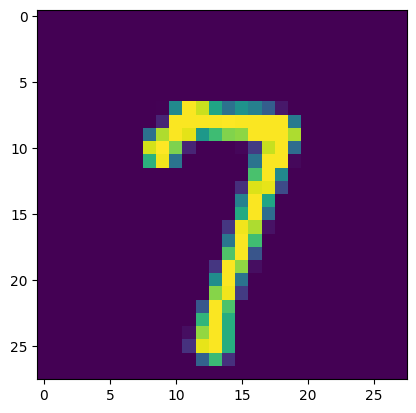

In [21]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1564])